#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [171]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2


In [149]:
from sklearn.datasets import load_boston

In [150]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [151]:
boston = load_boston()

/Users/anastasiafilippova/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

In [152]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [153]:
feature_names = boston.feature_names
data = boston.data
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [154]:
price = boston.target
y = pd.DataFrame(price)
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [157]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

/Users/anastasiafilippova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


До:	(404, 13)
После:	(404, 2)


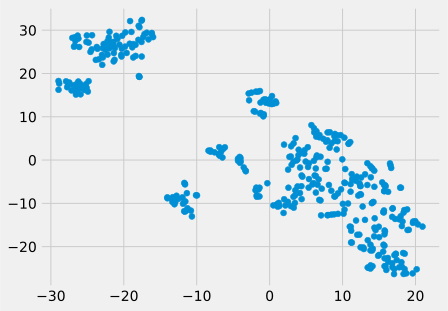

In [158]:
plt.scatter (X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

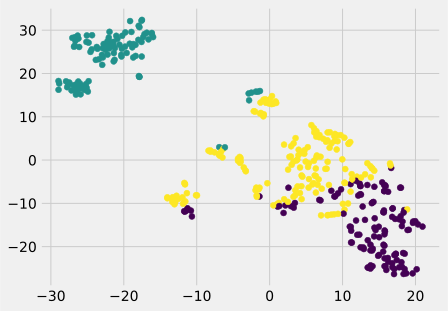

In [159]:
kmeans = KMeans (n_clusters=3, max_iter = 100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [160]:
price_mean_0 = y_train[labels_train == 0].mean()
price_mean_1 = y_train[labels_train == 1].mean()
price_mean_2 = y_train[labels_train == 2].mean()

print(f"mean price claster 0 = {price_mean_0}"'\n'
      f"mean price claster 1 = {price_mean_1}"'\n'
      f"mean price claster 2 = {price_mean_2}")

mean price claster 0 = 0    27.934646
dtype: float64
mean price claster 1 = 0    15.513333
dtype: float64
mean price claster 2 = 0    22.805233
dtype: float64


In [161]:
CRIM_mean_0 = X_train.CRIM[labels_train == 0].mean()
CRIM_mean_1 = X_train.CRIM[labels_train == 1].mean()
CRIM_mean_2 = X_train.CRIM[labels_train == 2].mean()
print(f"mean CRIM claster 0 = {CRIM_mean_0}"'\n'
      f"mean CRIM claster 1 = {CRIM_mean_1}"'\n'
      f"mean CRIM claster 2 = {CRIM_mean_2}")

mean CRIM claster 0 = 0.09492952755905511
mean CRIM claster 1 = 12.049776666666668
mean CRIM claster 2 = 0.5670764534883717


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [162]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


/Users/anastasiafilippova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


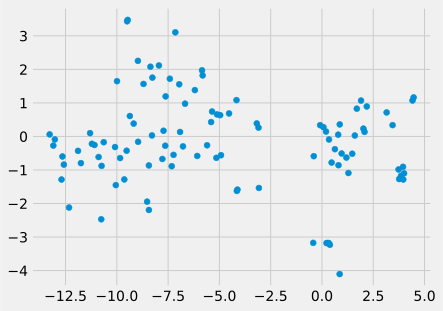

In [163]:
plt.scatter (X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.show()

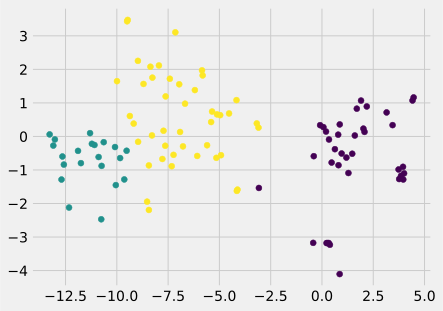

In [164]:
labels_test = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [165]:
price_mean_0 = y_test[labels_test == 0].mean()
price_mean_1 = y_test[labels_test == 1].mean()
price_mean_2 = y_test[labels_test == 2].mean()

print(f"mean price claster 0 = {price_mean_0}"'\n'
      f"mean price claster 1 = {price_mean_1}"'\n'
      f"mean price claster 2 = {price_mean_2}")

mean price claster 0 = 0    18.159459
dtype: float64
mean price claster 1 = 0    28.619048
dtype: float64
mean price claster 2 = 0    23.4
dtype: float64


In [166]:
CRIM_mean_0 = X_test.CRIM[labels_test == 0].mean()
CRIM_mean_1 = X_test.CRIM[labels_test == 1].mean()
CRIM_mean_2 = X_test.CRIM[labels_test == 2].mean()
print(f"mean CRIM claster 0 = {CRIM_mean_0}"'\n'
      f"mean CRIM claster 1 = {CRIM_mean_1}"'\n'
      f"mean CRIM claster 2 = {CRIM_mean_2}")

mean CRIM claster 0 = 11.678834864864864
mean CRIM claster 1 = 0.0845195238095238
mean CRIM claster 2 = 0.4484402272727273


#### *Задание 4
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.

In [172]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_test_pred = lr.predict(X_test_scaled)
r2(y_test, y_test_pred)

0.5785415472763407

In [409]:
Labels_clast_train = pd.Series(Labels_clast_train, name= 'cluster')
Labels_clast_test = pd.Series(Labels_clast_test, name='cluster')

In [410]:
X_train_scaled_clast = pd.concat([X_train_scaled, Labels_clast_train], axis=1)
X_test_scaled_clast = pd.concat([X_test_scaled, Labels_clast_test], axis=1)

In [418]:
lr = LinearRegression()
lr.fit(X_train_scaled_clast, y_train)
y_test_pred = lr.predict(X_test_scaled_clast)
r2(y_test, y_test_pred)

0.5837446034484208

#### *Задание 5
Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные и тестовые.
Масштабируйте данные.
Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.
С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.
Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.
Сделайте вывод, какие модели лучше себя показывают на этой задаче.

#### *Задание 6
Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.
Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.